In [69]:
# ! pip install opencv-python

In [70]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
import cv2 ## open cv library
from PIL import Image ## image processing


import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist ## mnist data
from tensorflow.math import confusion_matrix

## as google colab does allow it directly 
# from google.colab.patches import cv2_imshow ## to display image

### Loading Mnist data 

In [71]:
## it will return four arrays xtrain xtest ytrain ytest

(X_train,Y_train),(X_test,Y_test)=mnist.load_data('mnist.np2')

In [72]:
## there is only 3 params if 4th param as 3 will be there then it will be a rgb image
## but here it is grayscale image
print(X_train.shape,X_test.shape) ## 60000 images with 28 height and 28 width 
print(Y_train.shape,Y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [73]:
## images get converted into numpy array
type(X_train),type(Y_train),type(X_test),type(Y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

- Training data =60000 images
- test data =10000 images
- image dimension =28X28
- grayscale - only 1 color channel

In [74]:
## printing the image 
## value range from 0 255
print(X_train[10]) 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [75]:
print(X_train[0].shape)

(28, 28)


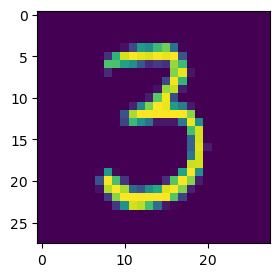

3


In [76]:
## displaying image
plt.figure(figsize=(3,4))
plt.imshow(X_train[50])
plt.show()

## dispaly corresponding label
print(Y_train[50])

In [77]:
### unique values in y_train
print(np.unique(Y_train))
### unique values in y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [78]:
# 0-1000000000
# 1-0100000000
# 2-0010000000 .... so on

- All images must have same dimensions ,if not then resize them

In [79]:
## scaling the values
X_train=X_train/255;
X_test=X_test/255;

In [80]:
print(np.unique(X_train))

[0.         0.00392157 0.00784314 0.01176471 0.01568627 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313725
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.0745098  0.07843137 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196078 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941176 0.13333333 0.1372549
 0.14117647 0.14509804 0.14901961 0.15294118 0.15686275 0.16078431
 0.16470588 0.16862745 0.17254902 0.17647059 0.18039216 0.18431373
 0.18823529 0.19215686 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568627 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313725 0.24705882 0.25098039 0.25490196
 0.25882353 0.2627451  0.26666667 0.27058824 0.2745098  0.27843137
 0.28235294 0.28627451 0.29019608 0.29411765 0.29803922 0.30196078
 0.30588235 0.30980392 0.31372549 0.31764706 0.32156863 0.3254902
 0.32941176 0.33333333 0.3372549  0.34117647 0.34509804 0.349019

## Building the neural network

In [124]:
# setting up the layers of the neural network
model=keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(50,activation='relu'),
        keras.layers.Dense(50,activation='relu'),
        keras.layers.Dense(10,activation='sigmoid') ## as we ahve ten classes
    ]
)

In [82]:
## compiling the neuron network
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [125]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor validation loss
                               patience=10,           # Stop after 10 epochs with no improvement
                               restore_best_weights=True)  # Restore the model with the best weights


In [84]:
## Fitting the data to our model
model.fit(X_train, Y_train, epochs=100,validation_data=(X_test, Y_test),
                    callbacks=[early_stopping])  # Using early stopping callback)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8491 - loss: 0.5207 - val_accuracy: 0.9551 - val_loss: 0.1563
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9576 - loss: 0.1447 - val_accuracy: 0.9635 - val_loss: 0.1213
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9698 - loss: 0.1028 - val_accuracy: 0.9638 - val_loss: 0.1131
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9763 - loss: 0.0801 - val_accuracy: 0.9655 - val_loss: 0.1133
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9810 - loss: 0.0650 - val_accuracy: 0.9633 - val_loss: 0.1216
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9836 - loss: 0.0540 - val_accuracy: 0.9643 - val_loss: 0.1229
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9868 - loss: 0.0451 - val_accuracy: 0.9623 - val_loss: 0.1398
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9879 - loss: 0

## Accuracy on traninig data 

In [104]:
# 99.20

In [86]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(loss,accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.9588 - loss: 0.1259
0.11312181502580643 0.9638000130653381


## Acccuracy on test data 

In [105]:
## 96.38

In [88]:
print(X_test.shape)

(10000, 28, 28)


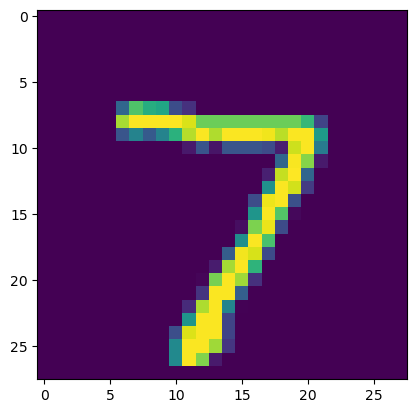

7


In [89]:
## first data point in X_test
plt.imshow(X_test[0])
plt.show()
print(Y_test[0])

In [90]:
y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step


In [91]:
# find the prediction probablity of each class for that data point

In [92]:
print(y_pred[0])

[2.7524710e-01 6.3706469e-03 8.3609778e-01 9.0444380e-01 1.7009100e-03
 1.4842983e-01 1.2989525e-05 9.9991542e-01 1.3614783e-01 4.3722841e-01]


In [93]:
label_for_first_image=np.argmax(y_pred[0])
print(label_for_first_image)

7


In [94]:
## converting the prediction probabilities to class label for all test data points
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 8, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 9, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test-> True labels

y_pred_labels-> predicted labels

In [95]:
# Build Confusion matrix

conf_mat=confusion_matrix(Y_test,y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 947    0    2    4    3    0    6    1    4   13]
 [   0 1117    2    3    0    0    4    3    6    0]
 [   4    2  983   14    7    1    4    5   12    0]
 [   0    0    4  990    1    2    1    3    9    0]
 [   0    0    5    1  960    0    7    1    4    4]
 [   5    0    0   23    3  836    7    1   15    2]
 [   3    3    0    1    4    2  940    1    4    0]
 [   1    3    9    7    0    0    1  984    4   19]
 [   0    1    3   15    2    2    4    3  943    1]
 [   2    5    0   14   29    3    0    8   10  938]], shape=(10, 10), dtype=int32)


Text(158.22222222222223, 0.5, 'True Labels')

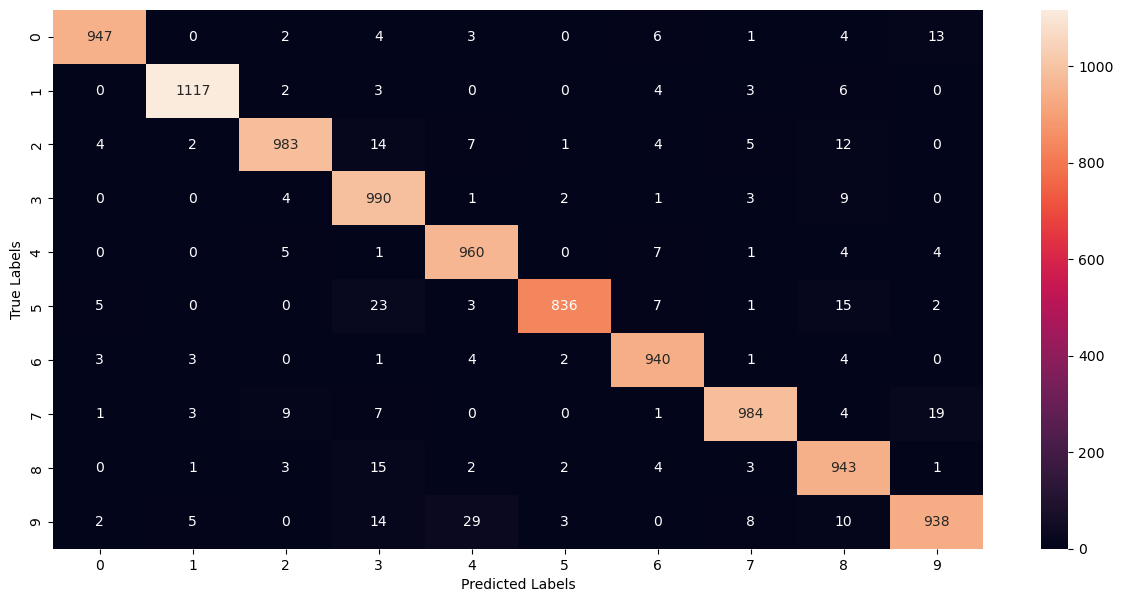

In [96]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

## Building predictive system

In [121]:
## imread for converting image to numpy array

In [106]:
input_image_path=('images.png')
input_image=cv2.imread(input_image_path)
type(input_image)

numpy.ndarray

In [107]:
input_image.shape ## colored image

(223, 226, 3)

In [122]:
# to show array as an image 

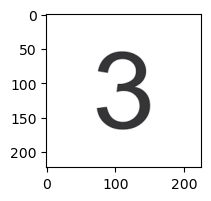

In [116]:
plt.figure(figsize=(2,2))
plt.imshow(input_image)

In [117]:
## converting colored image to grayscale
gray_scale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
gray_scale.shape

(223, 226)

(28, 28)


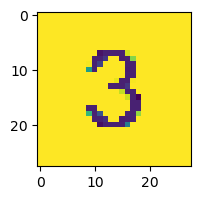

In [118]:
## resize the image 
input_image_resized=cv2.resize(gray_scale,(28,28))
print(input_image_resized.shape)
plt.figure(figsize=(2,2))
plt.imshow(input_image_resized)

In [119]:
## scaling the input image
input_image_resized=input_image_resized/255;
## reshape the image
input_image_reshaped=np.reshape(input_image_resized,[1,28,28])
print(input_image_reshaped.shape)
## prediction
pred=model.predict(input_image_reshaped)
print(pred)
label=(np.argmax(pred))

(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[1.0470623e-02 1.8398343e-07 6.8273000e-02 9.9999881e-01 1.4010028e-16
  9.8121136e-01 2.2686095e-04 2.2785724e-08 2.2710614e-02 4.3408298e-11]]


In [120]:
label

3